In [1]:
activitiesdf=spark.read.load("fit_store/hortovanyi.activities.parquet")
activitiesdf.cache()
activitiesdf.createOrReplaceTempView("activities")

In [2]:
results= spark.sql("select activityId, Timestamp(activityDateTime) as timestamp, distance, elapsedTime, movingTime, caloriesBurnt from activities")
results.show()

+----------+--------------------+---------+-----------+----------+-------------+
|activityId|           timestamp| distance|elapsedTime|movingTime|caloriesBurnt|
+----------+--------------------+---------+-----------+----------+-------------+
|1354047589|2012-11-28 06:19:...| 52901.69|       8553|      8120|          959|
|1354223222|2012-11-30 07:07:...| 74415.39|      11468|     10699|         1182|
|1354310159|2012-12-01 07:15:...| 58289.94|       9315|      8524|          893|
|1354390147|2012-12-02 05:29:...| 73341.14|      11944|     11338|         1409|
|1354654690|2012-12-05 06:58:...| 66219.84|      13381|     10993|         1273|
|1354738960|2012-12-06 06:22:...|100377.06|      16581|     15734|         1884|
|1354824870|2012-12-07 06:14:...| 60281.83|       9004|      8351|          998|
|1354912164|2012-12-08 06:29:...| 71723.83|      11668|     10719|         1106|
|1355174901|2012-12-11 07:28:...| 40397.36|       6481|      5885|          664|
|1355349495|2012-12-13 07:58

In [3]:
from pyspark.sql.functions import window, sum
w=activitiesdf.groupBy(window('activityDateTime','7 day')).agg(sum("distance").alias('totalDistance'))

In [4]:
weeklysum=w.select(w.window.start.cast("string").alias("start"),w.window.end.cast("string").alias("end"), "totalDistance").collect()
weeklydf=spark.createDataFrame(weeklysum)

In [5]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

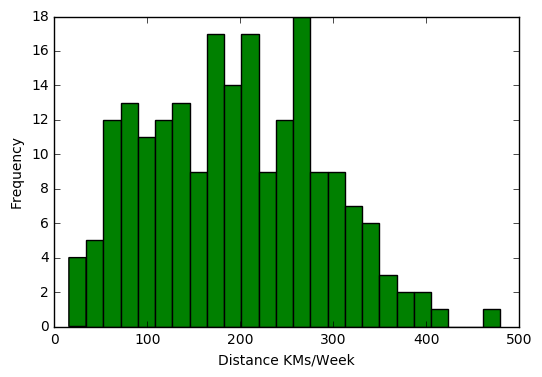

In [6]:
num_bins = 25
plt.xlabel('Distance KMs/Week')
plt.ylabel('Frequency')
n, bins, patches = plt.hist(weeklydf.toPandas()['totalDistance']/1000, num_bins, facecolor='green')

In [7]:
weeklydf.orderBy("totalDistance",ascending=False).show()

+-------------------+-------------------+------------------+
|              start|                end|     totalDistance|
+-------------------+-------------------+------------------+
|2015-04-30 10:00:00|2015-05-07 10:00:00|         479334.31|
|2015-04-09 10:00:00|2015-04-16 10:00:00|         422166.85|
|2015-05-07 10:00:00|2015-05-14 10:00:00|399449.94999999995|
|2012-12-27 10:00:00|2013-01-03 10:00:00|         396364.98|
|2012-09-27 10:00:00|2012-10-04 10:00:00|         385629.23|
|2012-11-29 10:00:00|2012-12-06 10:00:00|372643.37000000005|
|2012-11-15 10:00:00|2012-11-22 10:00:00|         368036.75|
|2013-02-07 10:00:00|2013-02-14 10:00:00|362254.75999999995|
|2013-10-03 10:00:00|2013-10-10 10:00:00|361038.18000000005|
|2014-08-28 10:00:00|2014-09-04 10:00:00|340464.68999999994|
|2015-04-16 10:00:00|2015-04-23 10:00:00|336506.76999999996|
|2016-09-29 10:00:00|2016-10-06 10:00:00|334256.07999999996|
|2013-09-05 10:00:00|2013-09-12 10:00:00|         333909.91|
|2012-11-08 10:00:00|201